<a href="https://colab.research.google.com/github/Danata117/ML/blob/main/ML_Praktika4_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas seaborn scikit-learn

# Домашнее задание 4

1. Преобразовать датасет (процессинг категориальных признаков, копия данных в df_not_processed, scale датасета)
2. Сделать k-means кластеризацию (записать cluster в df_not_processed, вывести статистику, графики. попробовать объяснить принцип кластеризации), оценить метриками, вывести результат
3. Подобрать оптимальное число кластеров с помощью "метод локтя", вывести статистику, графики, метрики, объяснить результат
4. Сделать DBSSCAN кластеризацию, подобрать оптимальные параметры, посчитать метрики, вывести статистику, объяснить результат
5. Ответить на вопрос - какой из методов кластеризации больше подходит для вашего датасета

# 1. Преобразовать датасет (процессинг категориальных признаков, копия данных в df_not_processed, scale датасета)

In [2]:
# --- Импорт библиотек ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import seaborn as sns

In [3]:
PATH_TO_FILE: str = '/content/student_depression_dataset.csv' # Загрузка набора данных
df = pd.read_csv(PATH_TO_FILE) # функция превращение данных из CSV в DataFrame
# вывод датафрейма
df


,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,'5-6 hours',Unhealthy,'Class 12',Yes,7.0,1.0,Yes,0
27897,140686,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,'Less than 5 hours',Healthy,MSc,No,0.0,3.0,Yes,0
27898,140689,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,'5-6 hours',Unhealthy,MD,No,12.0,2.0,No,0
27899,140690,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,'Less than 5 hours',Healthy,'Class 12',Yes,10.0,5.0,No,1


In [4]:
# преобразовать категориальные признаки в category
df['Gender'] = df['Gender'].astype('category')
df['City'] = df['City'].astype('category')
df['Profession'] = df['Profession'].astype('category')
df['Sleep Duration'] = df['Sleep Duration'].astype('category')
df['Dietary Habits'] = df['Dietary Habits'].astype('category')
df['Degree'] = df['Degree'].astype('category')
df['Have you ever had suicidal thoughts ?'] = df['Have you ever had suicidal thoughts ?'].astype('category')
df['Financial Stress'] = df['Financial Stress'].astype('category')
df['Family History of Mental Illness'] = df['Family History of Mental Illness'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   id                                     27901 non-null  int64   
 1   Gender                                 27901 non-null  category
 2   Age                                    27901 non-null  float64 
 3   City                                   27901 non-null  category
 4   Profession                             27901 non-null  category
 5   Academic Pressure                      27901 non-null  float64 
 6   Work Pressure                          27901 non-null  float64 
 7   CGPA                                   27901 non-null  float64 
 8   Study Satisfaction                     27901 non-null  float64 
 9   Job Satisfaction                       27901 non-null  float64 
 10  Sleep Duration                         27901 non-null  cat

In [5]:
category_columns: list[str] = df.select_dtypes(include=['category']).columns # собираем колонки помеченные как category

# Применяем One-Hot Encoding
category_columns = df.select_dtypes(include=['category']).columns
df_encoded = pd.get_dummies(df, columns=category_columns, drop_first=True)

# --- Копия для анализа без масштабирования ---
df_not_processed = df.copy()

# --- Масштабирование числовых признаков ---
from sklearn.preprocessing import StandardScaler

numeric_features = df_encoded.select_dtypes(include=['float64', 'int64']).columns.tolist()
scaler = StandardScaler()
df_encoded[numeric_features] = scaler.fit_transform(df_encoded[numeric_features])

# --- Проверим результат ---
print(f"Форма после кодирования и масштабирования: {df_encoded.shape}")
df_encoded.head()

Форма после кодирования и масштабирования: (27901, 115)


,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Depression,Gender_Male,...,Degree_MSc,Degree_Others,Degree_PhD,Have you ever had suicidal thoughts ?_Yes,Financial Stress_2.0,Financial Stress_3.0,Financial Stress_4.0,Financial Stress_5.0,Financial Stress_?,Family History of Mental Illness_Yes
0,-1.733252,1.463165,1.345543,-0.009777,0.893393,-0.693425,-0.01534,-1.121213,0.841395,True,...,False,False,False,True,False,False,False,False,False,False
1,-1.733105,-0.371474,-0.826104,-0.009777,-1.194076,1.510636,-0.01534,-1.121213,-1.188502,False,...,False,False,False,False,True,False,False,False,False,True
2,-1.732662,1.055467,-0.102222,-0.009777,-0.425724,1.510636,-0.01534,0.497095,-1.188502,True,...,False,False,False,False,False,False,False,False,False,True
3,-1.732563,0.443921,-0.102222,-0.009777,-1.404862,-0.693425,-0.01534,-0.851495,0.841395,False,...,False,False,False,True,False,False,False,True,False,True
4,-1.732514,-0.167625,0.621660,-0.009777,0.322229,0.041262,-0.01534,-1.660650,-1.188502,False,...,False,False,False,True,False,False,False,False,False,False


***Преобразование датасета***

Для подготовки данных к кластеризации выполнены следующие шаги:

Определение категориальных признаков.
Столбцы Gender, City, Profession, Sleep Duration, Dietary Habits, Degree,
Have you ever had suicidal thoughts ?, Financial Stress, Family History of Mental Illness
преобразованы в тип category.

Кодирование категориальных переменных.
Для перевода категориальных данных в числовой формат применён метод One-Hot Encoding
с помощью pd.get_dummies(), что позволило использовать признаки в алгоритмах машинного обучения.

Создание копии необработанных данных.
Исходный датафрейм сохранён в переменной df_not_processed для последующего анализа
и добавления результатов кластеризации.

Масштабирование числовых признаков.
Для нормализации шкалы показателей использован StandardScaler
(все признаки приведены к единому масштабу со средним 0 и стандартным отклонением 1).
Это обеспечивает корректную работу алгоритмов кластеризации.

# 2. Сделать k-means кластеризацию (записать cluster в df_not_processed, вывести статистику, графики. попробовать объяснить принцип кластеризации), оценить метриками, вывести результат

In [25]:
X = df.to_numpy()


!pip install ipywidgets plotly


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import ipywidgets as widgets
from IPython.display import display, clear_output

def interactive_kmeans_visualization_3d(X, max_clusters=10, max_iterations=50):
    # Преобразуем DataFrame в numpy
    if isinstance(X, pd.DataFrame):
        X = X.values

    # Снижаем размерность до 3 компонент через PCA
    pca = PCA(n_components=3)
    X_pca = pca.fit_transform(X)

    def plot_kmeans_iteration(X_pca, centroids, labels=None, step=0):
        clear_output(wait=True)
        fig = plt.figure(figsize=(8, 6))
        ax = fig.add_subplot(111, projection='3d')

        if labels is not None:
            ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2],
                       c=labels, cmap='viridis', s=30, alpha=0.6)
        else:
            ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2],
                       s=30, alpha=0.6)

        ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2],
                   c='red', marker='x', s=100, label='Centroids')

        ax.set_title(f'K-means Iteration {step}', fontsize=14)
        ax.set_xlabel('PC1')
        ax.set_ylabel('PC2')
        ax.set_zlabel('PC3')
        ax.legend()
        plt.show()

    def k_means_interactive(X_pca, k, max_iters):
        np.random.seed(42)
        centroids = X_pca[np.random.choice(X_pca.shape[0], k, replace=False)]
        for step in range(max_iters):
            distances = np.linalg.norm(X_pca[:, np.newaxis] - centroids, axis=2)
            labels = np.argmin(distances, axis=1)
            plot_kmeans_iteration(X_pca, centroids, labels, step)
            new_centroids = np.array([X_pca[labels == i].mean(axis=0) for i in range(k)])
            if np.allclose(centroids, new_centroids, atol=1e-6):
                break
            centroids = new_centroids

    def run_kmeans(k, max_iters):
        k_means_interactive(X_pca, k, max_iters)

    # Ползунки
    k_slider = widgets.IntSlider(value=3, min=2, max=max_clusters, step=1, description='Clusters (k):')
    iter_slider = widgets.IntSlider(value=10, min=1, max=max_iterations, step=1, description='Max Iterations:')

    interactive_plot = widgets.interactive(run_kmeans, k=k_slider, max_iters=iter_slider)
    display(interactive_plot)



%matplotlib inline

# interactive_kmeans_visualization_3d(X)

In [36]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# --- Преобразование категориальных признаков ---
category_columns = [
    'Gender', 'City', 'Profession', 'Sleep Duration',
    'Dietary Habits', 'Degree',
    'Have you ever had suicidal thoughts ?', 'Financial Stress',
    'Family History of Mental Illness'
]

for col in category_columns:
    df[col] = df[col].astype('category')

# --- One-Hot Encoding ---
df_encoded = pd.get_dummies(df, columns=category_columns, drop_first=True)

# --- Копия необработанных данных ---
df_not_processed = df.copy()

# --- Масштабирование числовых признаков ---
numeric_features = df_encoded.select_dtypes(include=['float64', 'int64']).columns.tolist()
numeric_features = [col for col in numeric_features if col != 'id']  # исключаем ID
scaler = StandardScaler()
df_encoded[numeric_features] = scaler.fit_transform(df_encoded[numeric_features])

# --- Подготовка данных для K-Means ---
X = df_encoded.drop(columns=['id'], errors='ignore').values  # исключаем ID

# --- Обучение K-Means ---
k = 6  # число кластеров
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X)

# --- Добавляем номера кластеров в df_not_processed ---
df_not_processed['cluster'] = clusters

# --- Метрики качества кластеризации ---
inertia = kmeans.inertia_
sil_score = silhouette_score(X, clusters)

print(f"K-Means с {k} кластерами")
print(f"Inertia (внутренняя сумма квадратов): {inertia:.2f}")
print(f"Silhouette Score: {sil_score:.3f}")

# --- Средние значения по кластерам (только числовые признаки) ---
numeric_cols = df_not_processed.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_cols = [col for col in numeric_cols if col != 'id']  # исключаем ID
cluster_means = df_not_processed.groupby('cluster')[numeric_cols].mean().round(2)

print("\nСредние значения признаков по кластерам:")
print(cluster_means)





K-Means с 6 кластерами
Inertia (внутренняя сумма квадратов): 227067.19
Silhouette Score: 0.076

Средние значения признаков по кластерам:
           Age  Academic Pressure  Work Pressure  CGPA  Study Satisfaction  \
cluster                                                                      
0        24.66               3.79            0.0  6.21                2.91   
1        22.29               2.04            0.0  7.66                3.24   
2        28.00               0.00            5.0  0.00                0.00   
3        31.02               2.43            0.0  7.57                3.28   
4        25.04               3.66            0.0  8.85                2.61   
5        24.89               3.79            0.0  7.95                2.65   

         Job Satisfaction  Work/Study Hours  Depression  
cluster                                                  
0                     0.0              9.15        0.98  
1                     0.0              6.01        0.01  
2     

In [34]:
from sklearn.cluster import KMeans
import pandas as pd

# Обучаем K-Means
kmeans = KMeans(n_clusters=6, random_state=42)
clusters = kmeans.fit_predict(X)

# Копируем исходный DataFrame
df_cluster = df_encoded.copy()

# Добавляем колонку с номерами кластеров
df_cluster['cluster'] = clusters

# Средние значения по каждому кластеру
cluster_means = df_cluster.groupby('cluster').mean()

cluster_means.round(2)


,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Depression,Gender_Male,...,Degree_MSc,Degree_Others,Degree_PhD,Have you ever had suicidal thoughts ?_Yes,Financial Stress_2.0,Financial Stress_3.0,Financial Stress_4.0,Financial Stress_5.0,Financial Stress_?,Family History of Mental Illness_Yes
cluster,,,,,,,,,,,,,,,,,,,,,
0,70621.71,-0.24,0.47,-0.01,-0.98,-0.03,-0.00,0.54,0.79,0.55,...,0.05,0.0,0.01,0.85,0.14,0.19,0.23,0.34,0.0,0.52
1,69996.97,-0.72,-0.80,-0.00,0.00,0.22,-0.00,-0.31,-1.16,0.55,...,0.04,0.0,0.01,0.31,0.26,0.19,0.16,0.11,0.0,0.44
2,75818.00,0.44,-2.27,113.65,-5.21,-2.16,90.09,-0.45,-0.17,1.00,...,0.00,0.0,0.00,0.50,0.00,0.50,0.50,0.00,0.0,0.00
3,70741.66,1.06,-0.52,-0.01,-0.06,0.25,-0.00,-0.22,-1.16,0.56,...,0.05,0.0,0.03,0.32,0.24,0.18,0.15,0.11,0.0,0.46
4,70293.43,-0.16,0.38,-0.01,0.81,-0.25,-0.02,0.68,0.80,0.58,...,0.04,0.0,0.02,0.85,0.13,0.19,0.25,0.33,0.0,0.49
5,70485.81,-0.19,0.47,-0.01,0.20,-0.21,-0.00,-1.19,0.76,0.54,...,0.04,0.0,0.02,0.83,0.13,0.18,0.25,0.32,0.0,0.50


In [46]:
from sklearn.cluster import KMeans
import pandas as pd

# Обучаем K-Means
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X)

# Копируем исходный DataFrame
df_cluster = df_encoded.copy()

# Добавляем колонку с номерами кластеров
df_cluster['cluster'] = clusters

# Средние значения по каждому кластеру
cluster_means = df_cluster.groupby('cluster').mean()

cluster_means.round(2)

# --- Метрики качества кластеризации ---
inertia = kmeans.inertia_
sil_score = silhouette_score(X, clusters)

print(f"K-Means с 2 кластерами")
print(f"Inertia (внутренняя сумма квадратов): {inertia:.2f}")
print(f"Silhouette Score: {sil_score:.3f}")

K-Means с 2 кластерами
Inertia (внутренняя сумма квадратов): 11472680302482.75
Silhouette Score: 0.627


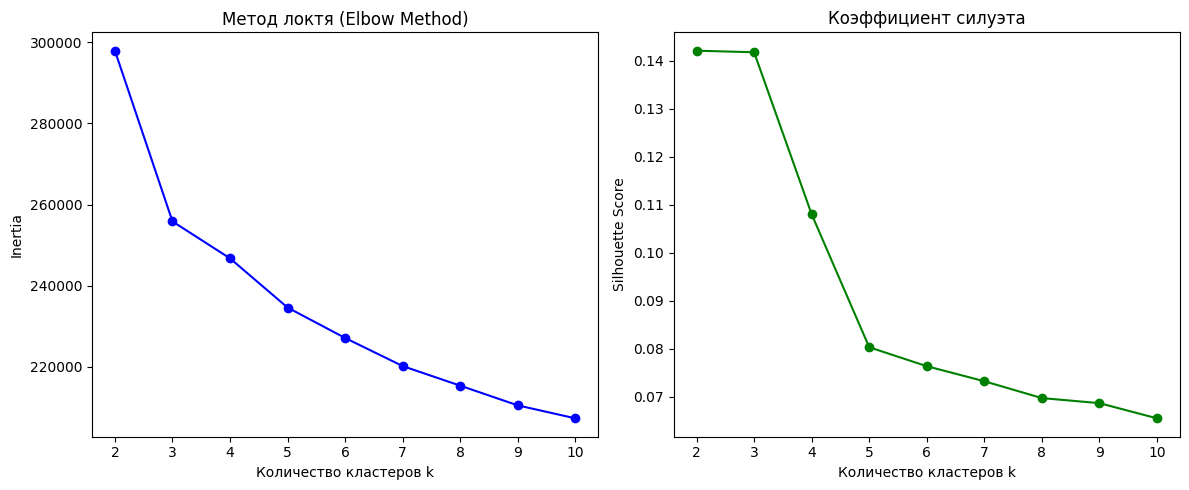

In [22]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

inertias = []
silhouettes = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)

    inertias.append(kmeans.inertia_)  # внутренняя метрика K-Means
    silhouettes.append(silhouette_score(X, kmeans.labels_))  # внешняя метрика

# Визуализация "метода локтя"
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(K, inertias, 'bo-')
plt.xlabel('Количество кластеров k')
plt.ylabel('Inertia')
plt.title('Метод локтя (Elbow Method)')

plt.subplot(1,2,2)
plt.plot(K, silhouettes, 'go-')
plt.xlabel('Количество кластеров k')
plt.ylabel('Silhouette Score')
plt.title('Коэффициент силуэта')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np

X = df_encoded.drop(columns=['id'], errors='ignore').values

# Попробуем большие eps из-за масштабирования
eps_values = [3, 5, 7, 10]
min_samples_values = [5, 10, 15]

best_silhouette = -1
best_params = None
best_labels = None

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

        # Вычисляем Silhouette только если найдено >=2 кластера
        if n_clusters >= 2:
            sil = silhouette_score(X, labels)
            if sil > best_silhouette:
                best_silhouette = sil
                best_params = (eps, min_samples)
                best_labels = labels

if best_params is not None:
    print(f"Лучшие параметры DBSCAN: eps={best_params[0]}, min_samples={best_params[1]}")
    print(f"Silhouette Score: {best_silhouette:.3f}")
    print(f"Количество кластеров (без шумовых точек): {len(set(best_labels)) - (1 if -1 in best_labels else 0)}")
    print(f"Количество шумовых точек: {(best_labels == -1).sum()}")

    # Добавляем метки к df_not_processed
    df_not_processed['dbscan_cluster'] = best_labels

    # Средние значения по кластерам (числовые)
    numeric_cols = df_not_processed.select_dtypes(include=['int64', 'float64']).columns.tolist()
    numeric_cols = [col for col in numeric_cols if col != 'ID']
    cluster_means_dbscan = df_not_processed.groupby('dbscan_cluster')[numeric_cols].mean().round(2)
    print("\nСредние значения признаков по DBSCAN-кластерам:")
    print(cluster_means_dbscan)
else:
    print("DBSCAN не нашёл более одного кластера ни с одной комбинацией eps/min_samples.")



In [19]:
from sklearn.cluster import DBSCAN
import pandas as pd
import numpy as np

# Обучаем DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=2)  # параметры можно подобрать
clusters = dbscan.fit_predict(X)

# Копируем исходный DataFrame
df_cluster = df_encoded.copy()

# Добавляем колонку с номерами кластеров
df_cluster['cluster'] = clusters

# Смотрим, какие кластеры сформировались
print("Количество найденных кластеров (без -1):", len(set(clusters)) - (1 if -1 in clusters else 0))
print("Количество выбросов (cluster = -1):", np.sum(clusters == -1))

# Средние значения по каждому кластеру
cluster_means = df_cluster.groupby('cluster').mean().round(2)

cluster_means

Количество найденных кластеров (без -1): 8
Количество выбросов (cluster = -1): 27885


,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Depression,Gender_Male,...,Degree_MSc,Degree_Others,Degree_PhD,Have you ever had suicidal thoughts ?_Yes,Financial Stress_2.0,Financial Stress_3.0,Financial Stress_4.0,Financial Stress_5.0,Financial Stress_?,Family History of Mental Illness_Yes
cluster,,,,,,,,,,,,,,,,,,,,,
-1,70447.25,0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.56,...,0.04,0.0,0.02,0.63,0.18,0.19,0.21,0.24,0.0,0.48
0,37733.50,-1.19,-0.10,-0.01,0.32,0.78,-0.02,-0.99,0.84,1.00,...,0.00,0.0,0.00,0.00,0.00,0.00,0.00,1.00,0.0,1.00
1,21469.50,-1.29,-0.10,-0.01,-0.83,-1.43,-0.02,1.17,0.84,1.00,...,0.00,0.0,0.00,1.00,0.00,0.00,1.00,0.00,0.0,1.00
2,33039.50,-0.07,-0.10,-0.01,-0.94,0.78,-0.02,1.04,0.84,1.00,...,0.00,0.0,0.00,1.00,0.00,0.00,0.00,1.00,0.0,0.00
3,72940.50,-1.49,0.62,-0.01,-0.21,0.78,-0.02,1.17,0.84,1.00,...,0.00,0.0,0.00,1.00,0.00,0.00,0.00,1.00,0.0,1.00
4,64840.00,-1.29,0.62,-0.01,0.60,0.78,-0.02,-1.53,-1.19,1.00,...,0.00,0.0,0.00,0.00,1.00,0.00,0.00,0.00,0.0,1.00
5,70129.00,-0.07,1.35,-0.01,1.08,-1.43,-0.02,0.63,0.84,1.00,...,0.00,0.0,0.00,1.00,0.00,0.00,0.00,1.00,0.0,0.00
6,96253.00,0.85,-0.10,-0.01,0.15,-0.69,-0.02,-1.12,0.84,1.00,...,0.00,0.0,0.00,1.00,0.00,0.00,0.00,1.00,0.0,1.00
7,96017.00,-1.59,1.35,-0.01,1.33,0.78,-0.02,0.50,0.84,1.00,...,0.00,0.0,0.00,1.00,0.00,0.00,1.00,0.00,0.0,0.00


In [18]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler

# Обучаем DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=2)
clusters = dbscan.fit_predict(X)

# Добавляем кластеры в DataFrame
df_cluster = df_encoded.copy()
df_cluster['cluster'] = clusters

# Убираем выбросы (-1) перед метриками
mask = clusters != -1
X_valid = X[mask]
labels_valid = clusters[mask]

if len(set(labels_valid)) > 1:  # нужно хотя бы 2 кластера для оценки
    sil = silhouette_score(X_valid, labels_valid)
    dbi = davies_bouldin_score(X_valid, labels_valid)
    chi = calinski_harabasz_score(X_valid, labels_valid)

    print(f"Silhouette Score: {sil:.3f}")
    print(f"Davies-Bouldin Index: {dbi:.3f}")
    print(f"Calinski-Harabasz Index: {chi:.3f}")
else:
    print("Недостаточно кластеров для расчёта метрик.")

Silhouette Score: 0.901
Davies-Bouldin Index: 0.112
Calinski-Harabasz Index: 278.128
